In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib.pyplot import suptitle
import matplotlib.style as style
from IPython.display import display, HTML
import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("/Users/pvaish10/Desktop/TADPOLE_D1_D2.csv")

In [3]:
df1 = df[['RID', 'PTID', 'VISCODE','D1', 'D2','DX','EXAMDATE','Years_bl','Month','AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG','AV45',
         'CDRSB','ADAS11','MMSE', 'RAVLT_immediate','Hippocampus', 'WholeBrain','Entorhinal', 'MidTemp','ABETA_UPENNBIOMK9_04_19_17',
         'TAU_UPENNBIOMK9_04_19_17','PTAU_UPENNBIOMK9_04_19_17']]

In [4]:
df1.head(1)

RID        PTID VISCODE  D1  D2  DX    EXAMDATE  Years_bl  Month   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  AV45  CDRSB  ADAS11  \
0    2  011_S_0002      bl   1   1  NL  2005-09-08       0.0      0  74.3     Male        16  Not Hisp/Latino    White  Married    0.0  1.36926   NaN    0.0   10.67   

   MMSE  RAVLT_immediate  Hippocampus  WholeBrain  Entorhinal  MidTemp ABETA_UPENNBIOMK9_04_19_17 TAU_UPENNBIOMK9_04_19_17 PTAU_UPENNBIOMK9_04_19_17  
0  28.0             44.0       8336.0   1229740.0      4177.0  27936.0

#### Select rows which have a DX value

In [5]:
df2 = df1.loc[df1['DX'].notnull()]

#### Make only three categories

In [6]:
df2 = df2.replace({'NL to MCI': 'MCI', 'MCI to Dementia': 'Dementia', 'MCI to NL' : 'NL', 'NL to Dementia': 'Dementia', 'Dementia to MCI': 'MCI'})

In [7]:
df2['DX'].value_counts()

MCI         4052
NL          2745
Dementia    2107
Name: DX, dtype: int64

#### Update the age as per the exam and diagnosis

In [8]:
df2['AGE_UPDATED'] = np.round(df2['AGE'] + df2['Years_bl'], 2)

In [9]:
df2.columns

Index(['RID', 'PTID', 'VISCODE', 'D1', 'D2', 'DX', 'EXAMDATE', 'Years_bl', 'Month', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED'],
      dtype='object')

#### How many examples are there

In [10]:
df2['D1'][df2['D1'] == 1].shape

(8841,)

In [11]:
df2['D1'][df2['D1'] == 0].shape

(63,)

In [12]:
df2['D2'][df2['D2'] == 1].shape

(5177,)

In [13]:
df2['D2'][df2['D2'] == 0].shape

(3727,)

In [14]:
df2.head(1)

RID        PTID VISCODE  D1  D2  DX    EXAMDATE  Years_bl  Month   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  AV45  CDRSB  ADAS11  \
0    2  011_S_0002      bl   1   1  NL  2005-09-08       0.0      0  74.3     Male        16  Not Hisp/Latino    White  Married    0.0  1.36926   NaN    0.0   10.67   

   MMSE  RAVLT_immediate  Hippocampus  WholeBrain  Entorhinal  MidTemp ABETA_UPENNBIOMK9_04_19_17 TAU_UPENNBIOMK9_04_19_17 PTAU_UPENNBIOMK9_04_19_17  AGE_UPDATED  
0  28.0             44.0       8336.0   1229740.0      4177.0  27936.0                                                                                       74.3

### Select the columns

In [15]:
df2.columns

Index(['RID', 'PTID', 'VISCODE', 'D1', 'D2', 'DX', 'EXAMDATE', 'Years_bl', 'Month', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED'],
      dtype='object')

In [16]:
df2['ABETA_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['ABETA_UPENNBIOMK9_04_19_17'], errors='coerce')
df2['TAU_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['TAU_UPENNBIOMK9_04_19_17'], errors='coerce')
df2['PTAU_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['PTAU_UPENNBIOMK9_04_19_17'], errors='coerce')

In [17]:
df3 = df2[['D1', 'D2', 'DX',  'PTGENDER', 'PTEDUCAT', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED']]

In [18]:
df3 = df3.replace({'NL': 1 , 'MCI': 2, 'Dementia': 3})

In [19]:
categorial_cols = [
    'PTGENDER']

for cc in categorial_cols:
    dummies = pd.get_dummies(df3[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df3.drop(cc, axis=1, inplace=True)
    df3 = df3.join(dummies)

In [20]:
df3.columns

Index(['D1', 'D2', 'DX', 'PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male'],
      dtype='object')

In [21]:
df4 = df3[['DX', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED']]

#### Correlation Analysis

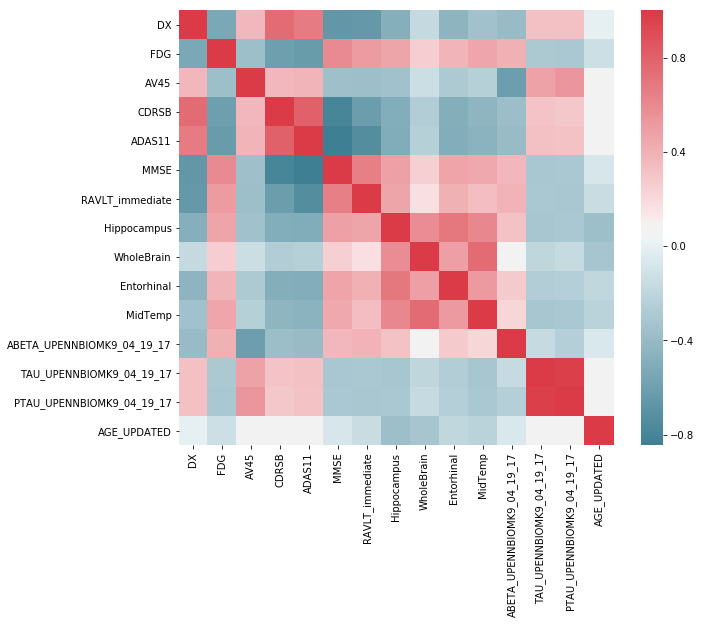

In [22]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = df4.corr(method = 'pearson') 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax) 

#### Correlation matrix

In [23]:
df4.corr(method = 'pearson') 

DX       FDG      AV45     CDRSB    ADAS11      MMSE  RAVLT_immediate  Hippocampus  WholeBrain  Entorhinal   MidTemp  \
DX                          1.000000 -0.537924  0.369889  0.751463  0.675037 -0.660572        -0.643512    -0.479757   -0.169255   -0.443162 -0.344146   
FDG                        -0.537924  1.000000 -0.365847 -0.604635 -0.626500  0.597089         0.514796     0.465169    0.258703    0.384648  0.455665   
AV45                        0.369889 -0.365847  1.000000  0.370759  0.382772 -0.360170        -0.362832    -0.340625   -0.133296   -0.289758 -0.243819   
CDRSB                       0.751463 -0.604635  0.370759  1.000000  0.803674 -0.800535        -0.619040    -0.504093   -0.254510   -0.487076 -0.437170   
ADAS11                      0.675037 -0.626500  0.382772  0.803674  1.000000 -0.845144        -0.740403    -0.507372   -0.244333   -0.496001 -0.457203   
MMSE                       -0.660572  0.597089 -0.360170 -0.800535 -0.845144  1.000000         0.651944     0.487784    0.255801    0.466712  0.440958   
RAVLT_immediate            -0.643512  0.514796 -0.362832 -0.619040 -0.740403  0.651944         1.000000     0.464828    0.171296    0.408314  0.342407   
Hippocampus                -0.479757  0.465169 -0.340625 -0.504093 -0.507372  0.487784         0.464828     1.000000    0.588082    0.692272  0.617681   
WholeBrain                 -0.169255  0.258703 -0.133296 -0.254510 -0.244333  0.255801         0.171296     0.588082    1.000000    0.489668  0.751364   
Entorhinal                 -0.443162  0.384648 -0.289758 -0.487076 -0.496001  0.466712         0.408314     0.692272    0.489668    1.000000  0.523957   
MidTemp                    -0.344146  0.455665 -0.243819 -0.437170 -0.457203  0.440958         0.342407     0.617681    0.751364    0.523957  1.000000   
ABETA_UPENNBIOMK9_04_19_17 -0.396272  0.403407 -0.613940 -0.371078 -0.392934  0.366663         0.388786     0.315475    0.073228    0.275424  0.220518   
TAU_UPENNBIOMK9_04_19_17    0.327901 -0.293311  0.479905  0.308724  0.328923 -0.311000        -0.301120    -0.312795   -0.191421   -0.259621 -0.313395   
PTAU_UPENNBIOMK9_04_19_17   0.328018 -0.302773  0.538855  0.291296  0.316196 -0.298598        -0.304610    -0.298276   -0.166974   -0.248978 -0.299442   
AGE_UPDATED                 0.001710 -0.125127  0.085368  0.077781  0.084853 -0.075727        -0.148917    -0.363644   -0.319059   -0.187868 -0.223703   

                            ABETA_UPENNBIOMK9_04_19_17  TAU_UPENNBIOMK9_04_19_17  PTAU_UPENNBIOMK9_04_19_17  AGE_UPDATED  
DX                                           -0.396272                  0.327901                   0.328018     0.001710  
FDG                                           0.403407                 -0.293311                  -0.302773    -0.125127  
AV45                                         -0.613940                  0.479905                   0.538855     0.085368  
CDRSB                                        -0.371078                  0.308724                   0.291296     0.077781  
ADAS11                                       -0.392934                  0.328923                   0.316196     0.084853  
MMSE                                          0.366663                 -0.311000                  -0.298598    -0.075727  
RAVLT_immediate                               0.388786                 -0.301120                  -0.304610    -0.148917  
Hippocampus                                   0.315475                 -0.312795                  -0.298276    -0.363644  
WholeBrain                                    0.073228                 -0.191421                  -0.166974    -0.319059  
Entorhinal                                    0.275424                 -0.259621                  -0.248978    -0.187868  
MidTemp                                       0.220518                 -0.313395                  -0.299442    -0.223703  
ABETA_UPENNBIOMK9_04_19_17                    1.000000                 -0.166316             

#### Dispersion matrix

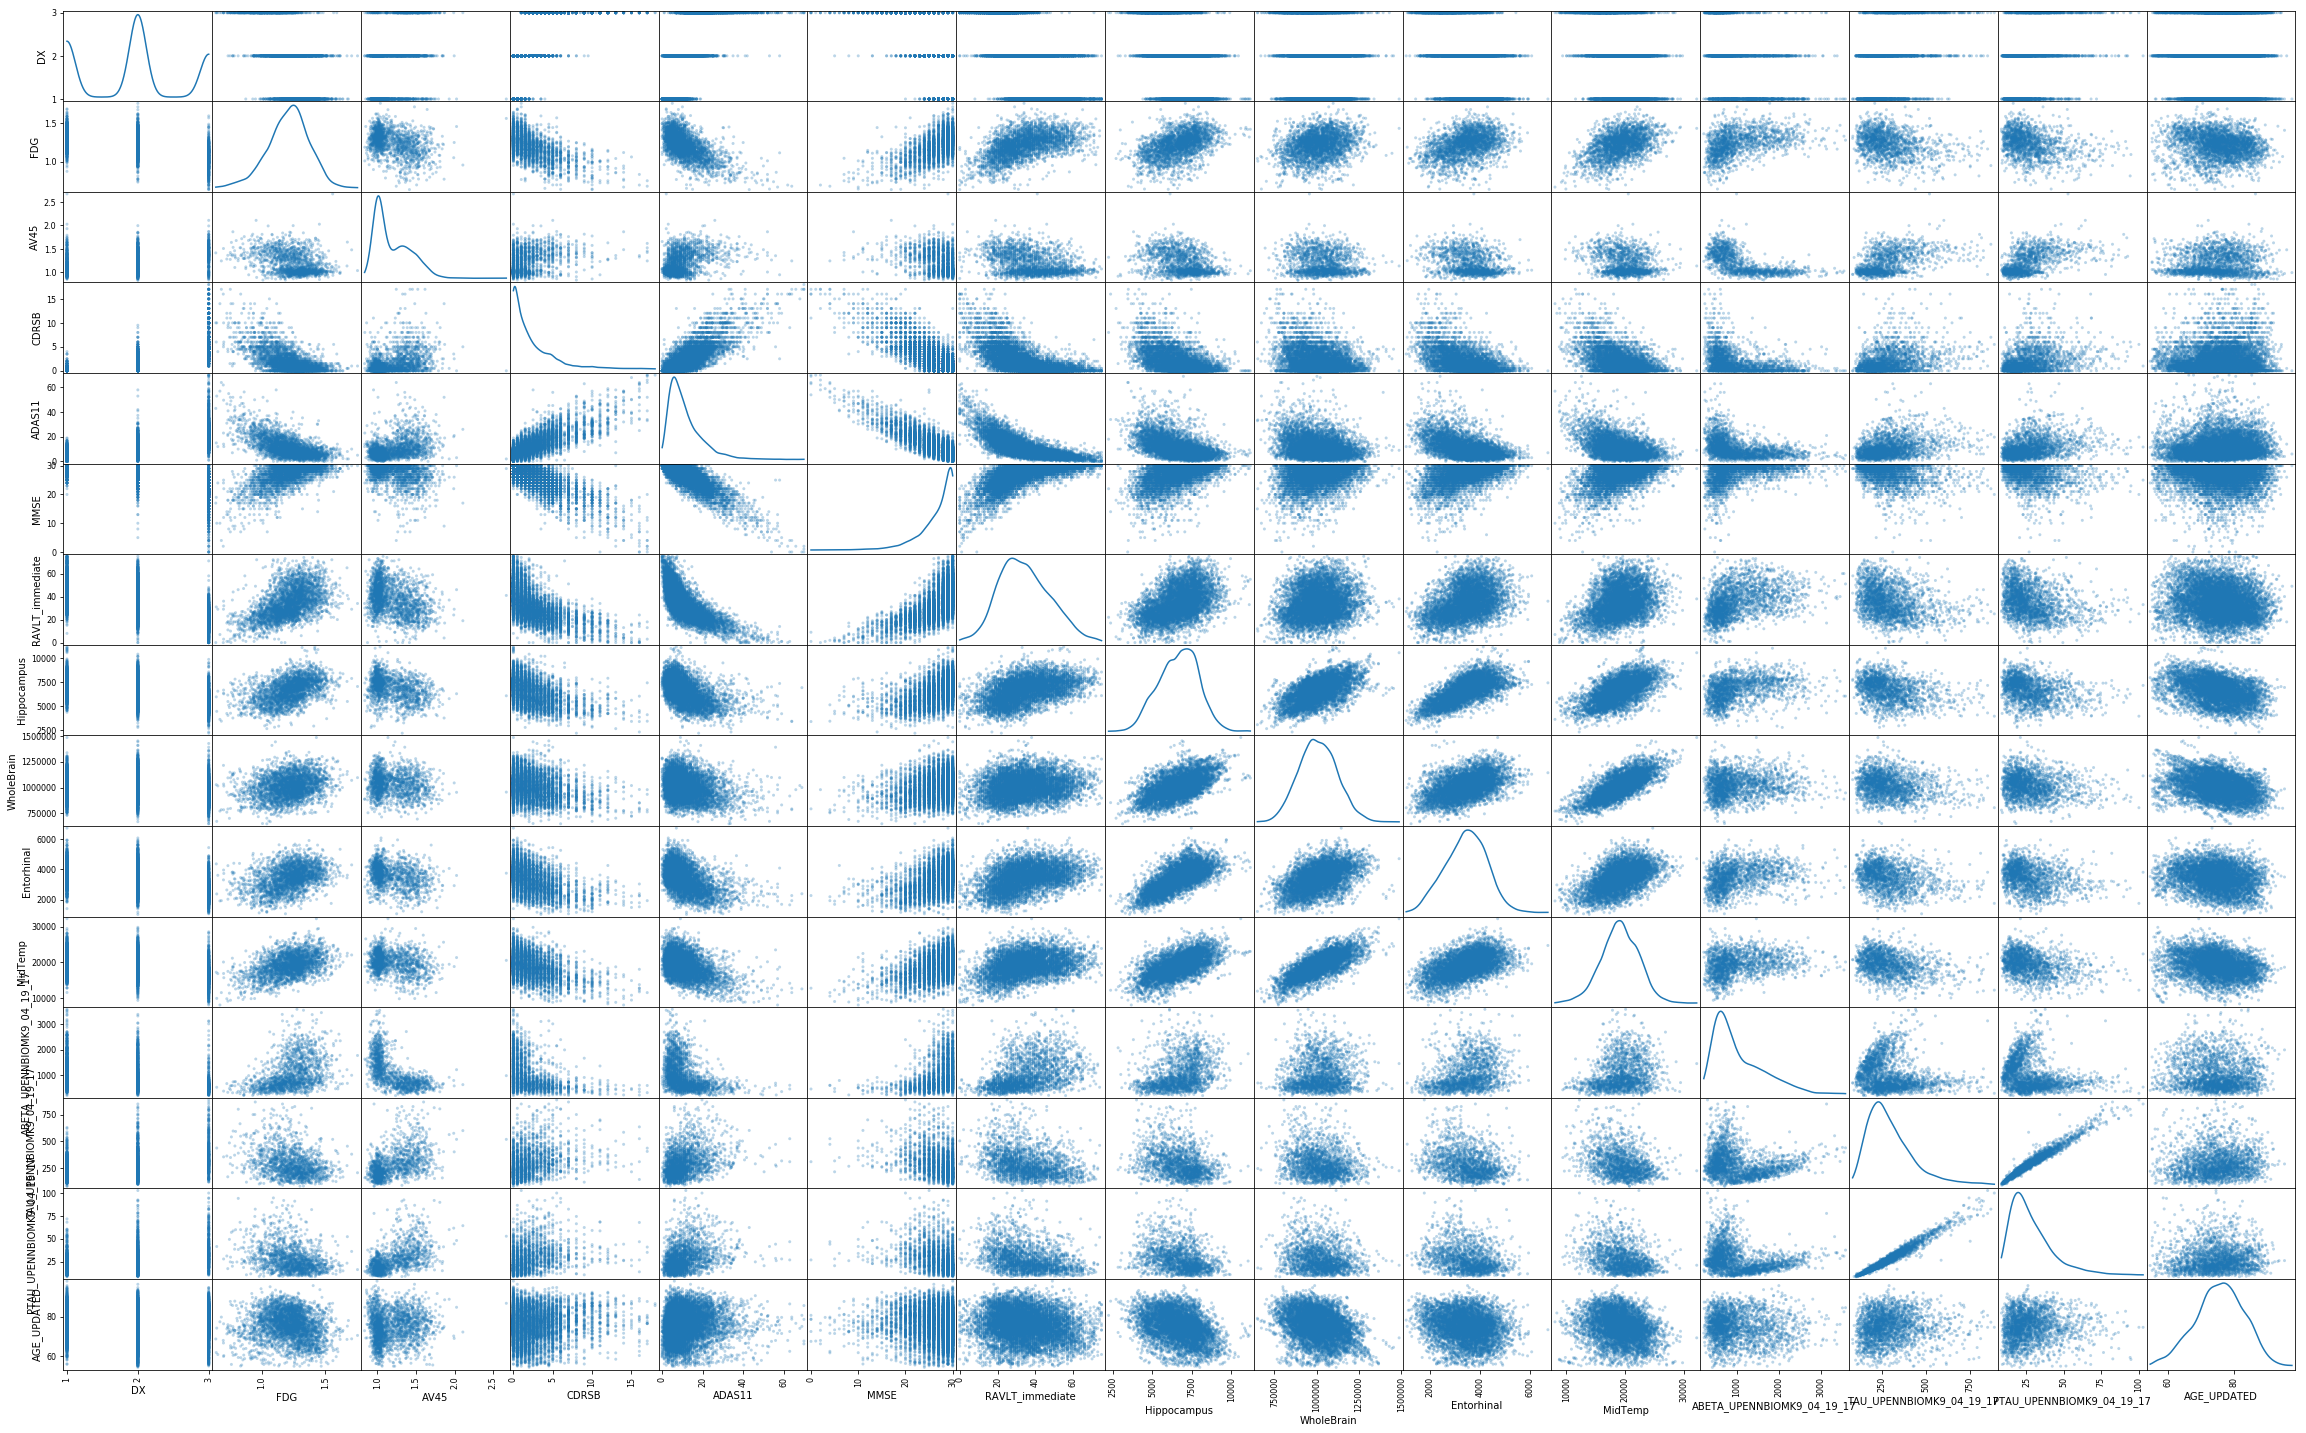

In [24]:
pd.scatter_matrix(df4, alpha = 0.3, figsize = (40,25), diagonal = 'kde'); 

#### Graphs of all these correlations

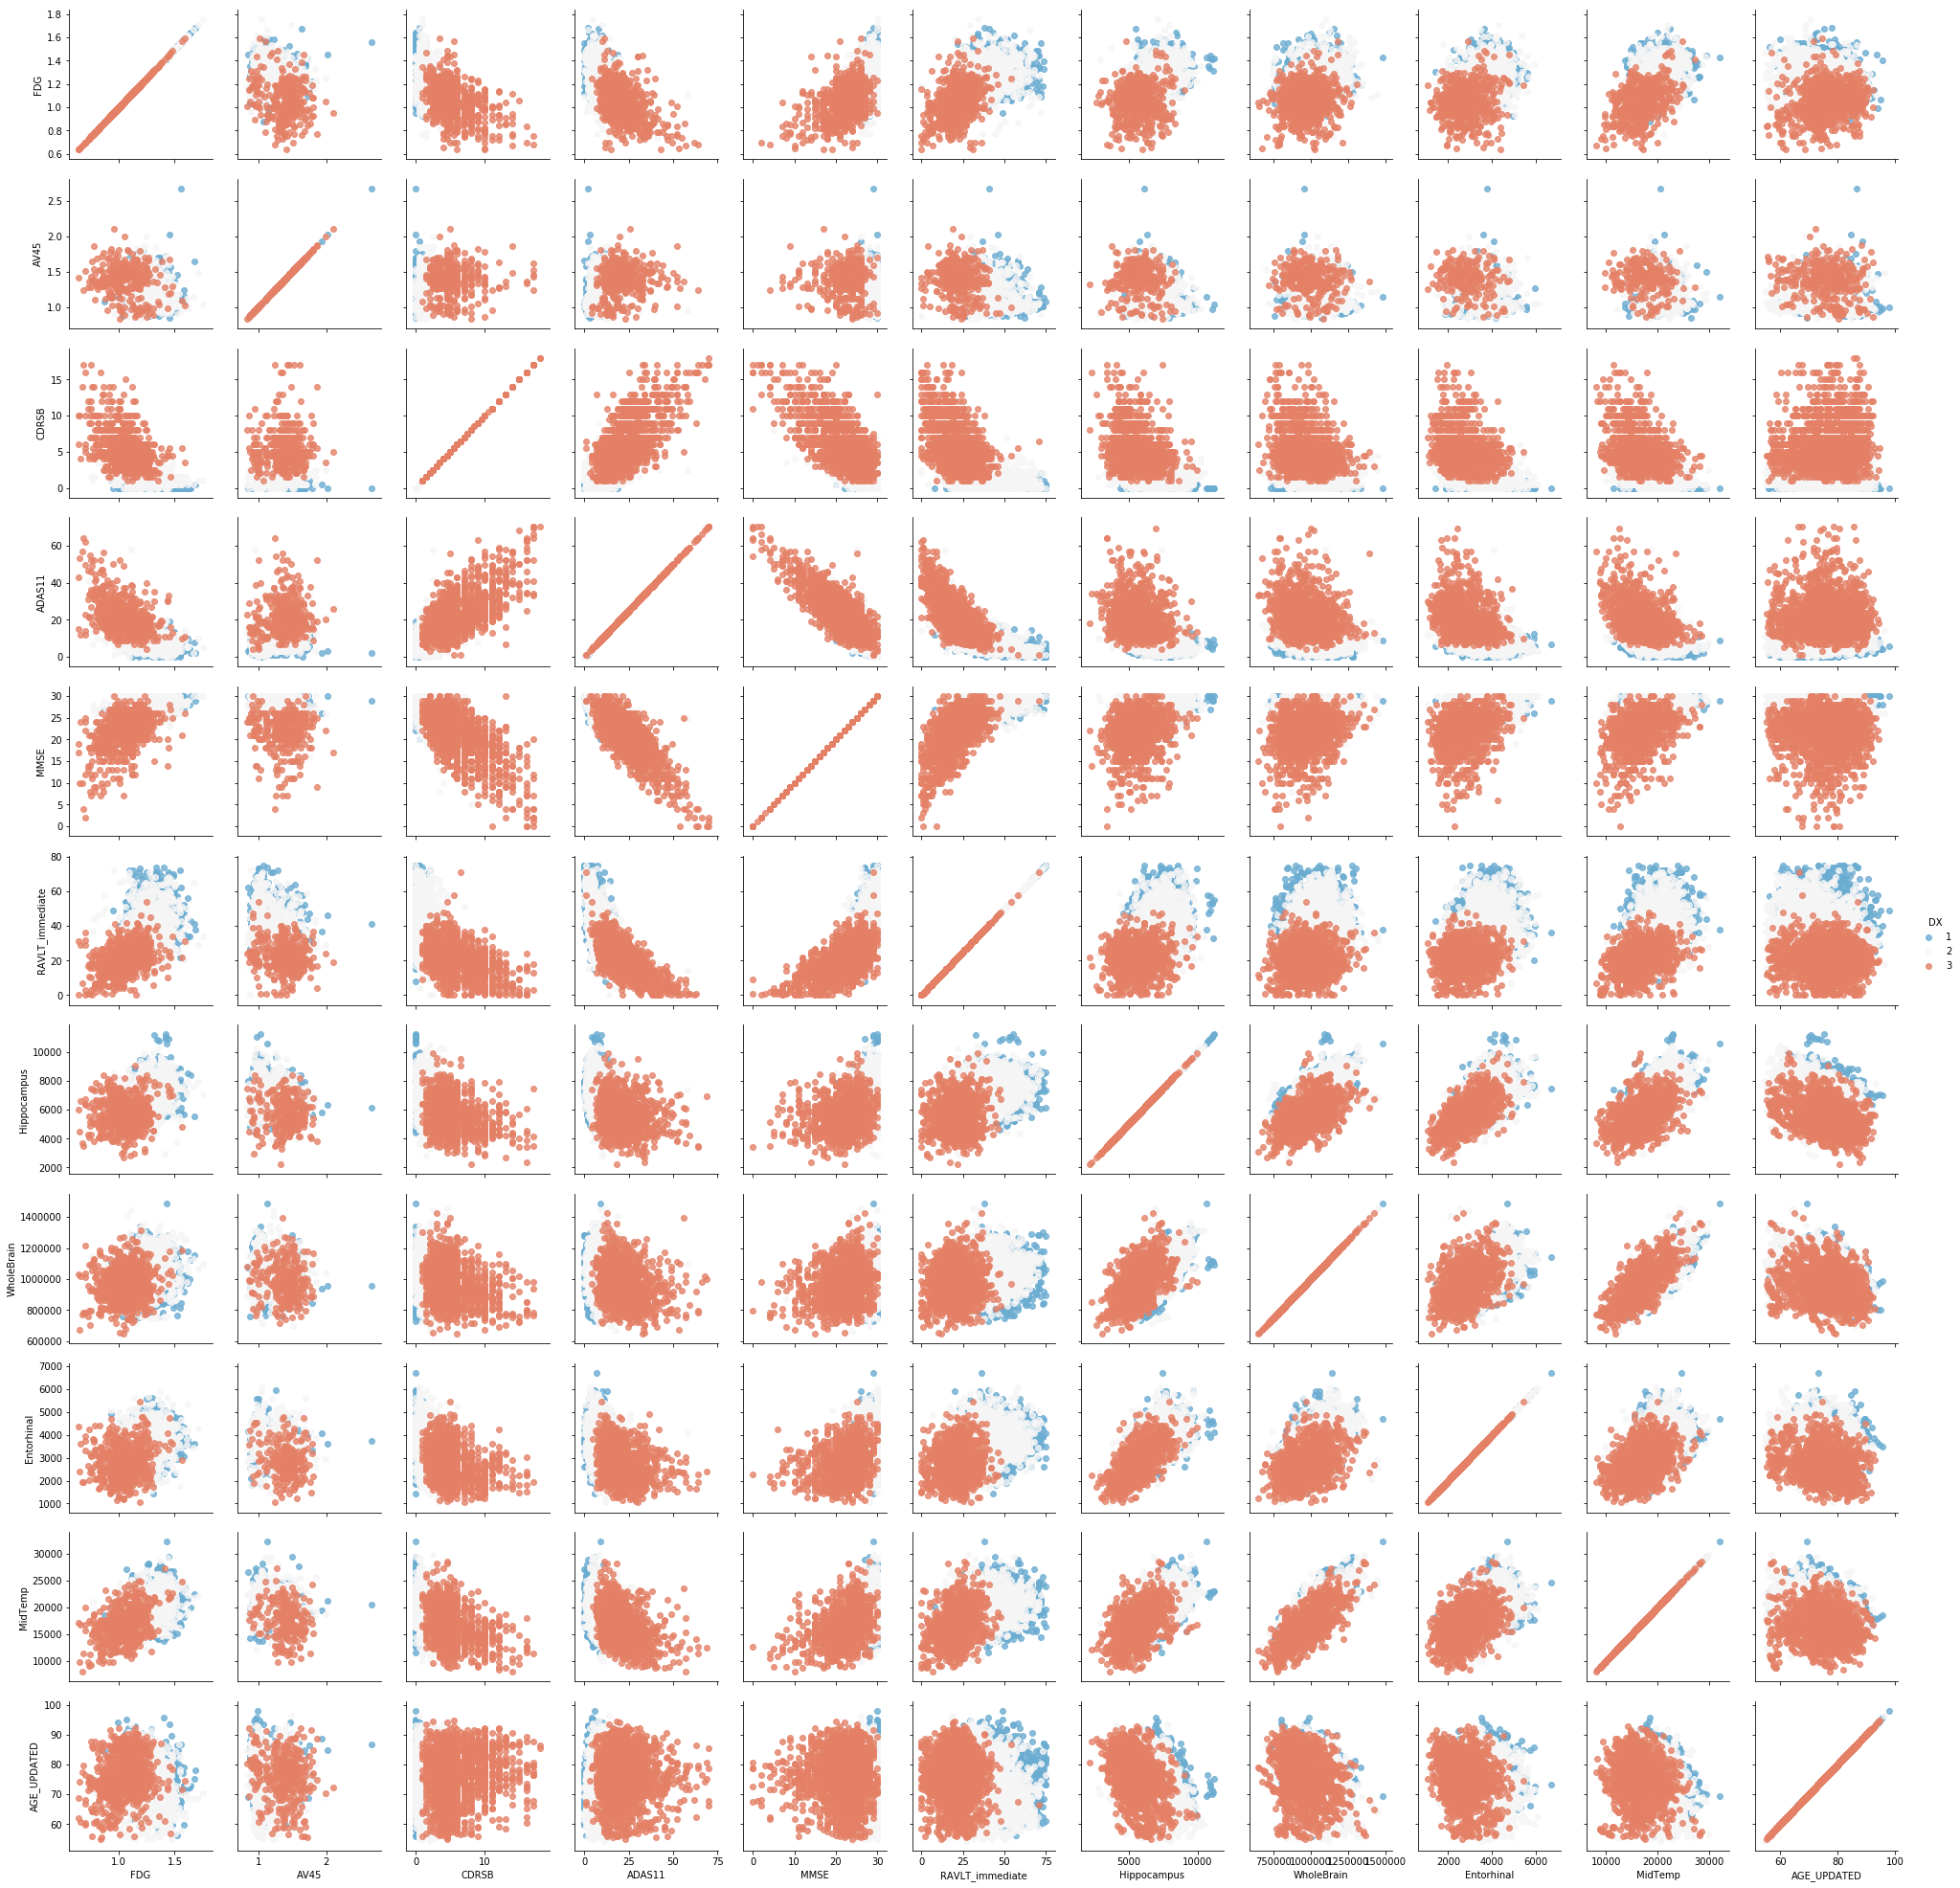

In [25]:
g = sns.PairGrid(df4, vars=['FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
         'AGE_UPDATED'],
                 hue='DX', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

#### Miscelleneous Charts

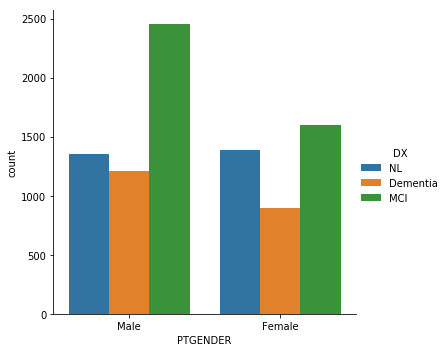

In [26]:
sns.factorplot('PTGENDER',data=df2,hue='DX',kind="count")

(12.5, 30.0)

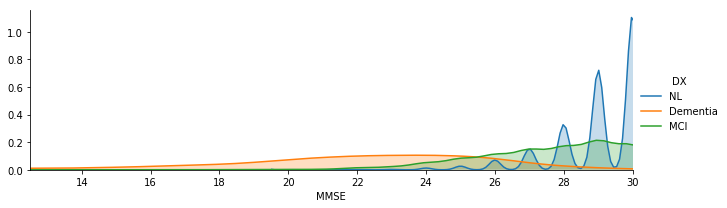

In [27]:
facet= sns.FacetGrid(df2,hue="DX", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df2['MMSE'].max()))
facet.add_legend()
plt.xlim(12.5)

(12.5, 70.0)

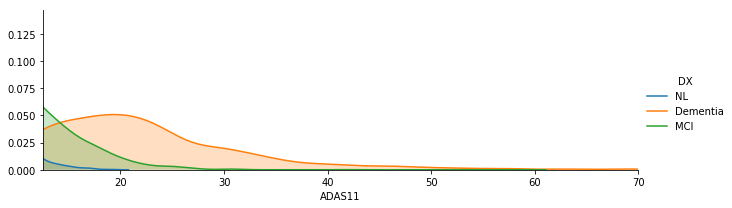

In [28]:
facet= sns.FacetGrid(df2,hue="DX", aspect=3)
facet.map(sns.kdeplot,'ADAS11',shade= True)
facet.set(xlim=(0, df2['ADAS11'].max()))
facet.add_legend()
plt.xlim(12.5)

(12.5, 75.0)

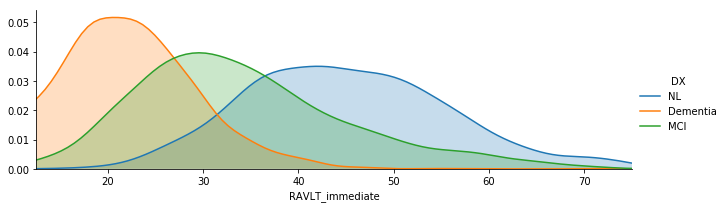

In [29]:
facet= sns.FacetGrid(df2,hue="DX", aspect=3)
facet.map(sns.kdeplot,'RAVLT_immediate',shade= True)
facet.set(xlim=(0, df2['RAVLT_immediate'].max()))
facet.add_legend()
plt.xlim(12.5)

### Imputation of lost values
For various reasons, many real-world data sets contain missing values, often encoded as blanks, NaNs, or other placeholders. However, these data sets are incompatible with scikit-learn estimators that assume that all values ​​in a matrix are numeric, and that they all have and have meaning. A basic strategy for using incomplete datasets is to discard rows and / or complete columns that contain missing values. However, this has the price of losing data that can be valuable (though incomplete). A better strategy is to impute the lost values, that is, to deduce them from the known part of the data.

The Imputer class provides basic strategies for imputation of missing values, using either the mean, the median or the most frequent value of the row or column in which the missing values ​​are found. This class also allows different encodings of missing values.

In [30]:
predictors = ['D1', 'D2','PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male']


In [31]:
train_X = df3[predictors][df3['D1'] == 1]
train_X = train_X[['PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male']]
test_X = df3[predictors][df3['D2'] == 1]
test_X = test_X[['PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male']]


train_y = df3.DX[df3['D1'] == 1]
test_y = df3.DX[df3['D2'] == 1]

In [32]:
from sklearn.impute  import SimpleImputer
# We perform it with the most frequent value 
my_imputer = SimpleImputer( missing_values = np.nan,strategy='most_frequent')
train_X_imputed = pd.DataFrame(my_imputer.fit_transform(train_X.values))
test_X_imputed = pd.DataFrame(my_imputer.fit_transform(test_X.values))

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled=scaler.fit_transform(train_X_imputed)
test_X_scaled=scaler.fit_transform(test_X_imputed)

In [34]:
#https://www.kaggle.com/rodrigox93/detecting-early-alzheimer-s-hyperparameter-0-86
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
FOLDS =10
scoring = ['f1']

### Tuning Hyperparameters for better models
Before adjusting our models, we will look for the parameters that give us a high AUC

#### 1° Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = range(10,250)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(1,40)
# Minimum number of samples required to split a node
min_samples_split = range(3,60)
# Create the random grid
parametro_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
model_forest = RandomForestClassifier(n_jobs=-1)
forest_random = RandomizedSearchCV(estimator = model_forest, param_distributions = parametro_rf, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring ='accuracy')
forest_random.fit(train_X_scaled, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': range(10, 250), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 40), 'min_samples_split': range(3, 60)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [ ]:
forest_random.best_params_

{'n_estimators': 49,
 'min_samples_split': 25,
 'max_features': 'auto',
 'max_depth': 22}

#### 2° Extra Tree

In [ ]:
# Number of trees in random forest
n_estimators = range(50,280)
# Maximum number of levels in tree
max_depth =  range(1,40)
# Minimum number of samples required to split a node
min_samples_leaf = [3,4,5,6,7,8,9,10,15,20,30,40,50,60]
# Create the random grid
parametro_Et = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
model_et = ExtraTreesClassifier(n_jobs=-1)
et_random = RandomizedSearchCV(estimator = model_et, param_distributions = parametro_rf, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
et_random.fit(train_X_scaled, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': range(10, 250), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 40), 'min_samples_split': range(3, 60)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [ ]:
et_random.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 37}

#### 3° AdaBoos

In [ ]:
n_estimators = range(10,200)

learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]
# Create the random grid
parametros_ada = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
model_ada = AdaBoostClassifier()

ada_random = RandomizedSearchCV(estimator = model_ada, param_distributions = parametros_ada, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
ada_random.fit(train_X_scaled, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': range(10, 200), 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [ ]:
ada_random.best_params_

{'n_estimators': 37, 'learning_rate': 0.2}

#### 4° Gradient Boosting

In [ ]:
parametros_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_split": [0.01, 0.025, 0.005,0.4,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_leaf": [1,2,3,5,8,10,15,20,40,50,55,60,65,70,80,85,90,100],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(1,100)
    }

model_gb= GradientBoostingClassifier()


gb_random = RandomizedSearchCV(estimator = model_gb, param_distributions = parametros_gb, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
gb_random.fit(train_X_scaled, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 164.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 210.5min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'loss': ['deviance'], 'learning_rate': [0.01, 0.025, 0.005, 0.5, 0.075, 0.1, 0.15, 0.2, 0.3, 0.8, 0.9], 'min_samples_split': [0.01, 0.025, 0.005, 0.4, 0.5, 0.075, 0.1, 0.15, 0.2, 0.3, 0.8, 0.9], 'min_samples_leaf': [1, 2, 3, 5, 8, 10, 15, 20, 40, 50, 55, 60, 65, 70, 80, 85, 90, ...n_mse', 'mae'], 'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0], 'n_estimators': range(1, 100)},
          pre_dispatch='2*n_jobs', random_state=4

In [ ]:
gb_random.best_params_

{'subsample': 0.9,
 'n_estimators': 32,
 'min_samples_split': 0.01,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'loss': 'deviance',
 'learning_rate': 0.025,
 'criterion': 'friedman_mse'}

#### 5° Support Vector

In [35]:
C = [0.001, 0.10, 0.1, 10, 25, 50, 100]

kernel =  ['linear', 'poly', 'rbf', 'sigmoid']
    
gamma =[1e-2, 1e-3, 1e-6,1]
# Create the random grid
parametros_svm = {'C': C,
            'gamma': gamma,
             'kernel': kernel}
model_svm = SVC()
from sklearn.model_selection import GridSearchCV
svm_random = GridSearchCV(model_svm, parametros_svm,  cv = FOLDS, 
                               verbose=2, n_jobs = -1, scoring='accuracy')
svm_random.fit(train_X_scaled, train_y)


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 879.1min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 2232.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100], 'gamma': [0.01, 0.001, 1e-06, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [36]:
svm_random.best_params_

{'C': 25, 'gamma': 0.01, 'kernel': 'linear'}

#### 6° xgboost

In [37]:
param_xgb = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [50,100,120]}

In [38]:
from sklearn.model_selection import GridSearchCV

model_xgb = xgb.XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = model_xgb, param_distributions = param_xgb, n_iter = 100, cv = FOLDS, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
xgb_random.fit(train_X_scaled, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.8min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'silent': [False], 'max_depth': [6, 10, 15, 20], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0, 3], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 'gamma': [0, 0.25, 0.5, 1.0], 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 'n_estima

In [39]:
xgb_random.best_params_

{'subsample': 0.6,
 'silent': False,
 'reg_lambda': 0.1,
 'n_estimators': 120,
 'min_child_weight': 1.0,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.25,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.4}

#### Selected Parameters
After running RandomizedSearchCV several times, we found the most acceptable parameters for each of our models. We will save these parameters to then make the adjustment of our models.

#### Generating our models
So now let's prepare five learning models as our classification. All these models can be invoked conveniently through the Sklearn library and are listed below:

* random forest sorter
* AdaBoost classifier.
* Gradient Boosting classifer
* Support vector machine
* Extra Trees

* Random Forest : {'n_estimators': 49,
 'min_samples_split': 25,
 'max_features': 'auto',
 'max_depth': 22}
 
* 2° Extra Tree : {'n_estimators': 60,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 37}
 
* Adaboost : {'n_estimators': 37, 'learning_rate': 0.2}
* Gradient Boosting : {'subsample': 0.9,
 'n_estimators': 32,
 'min_samples_split': 0.01,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'loss': 'deviance',
 'learning_rate': 0.025,
 'criterion': 'friedman_mse'}
 
 * SVM
 {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
 
 * XGBoost
 {'subsample': 0.6,
 'silent': False,
 'reg_lambda': 0.1,
 'n_estimators': 120,
 'min_child_weight': 1.0,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.25,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.4}



In [40]:
#base models with hyper parameters already tuned
model_rf =  RandomForestClassifier(n_estimators=49,min_samples_split=25,max_features='auto',max_depth= 22)
model_et = ExtraTreesClassifier(n_estimators=60,min_samples_split=8,max_features='sqrt',max_depth= 37)
model_ada = AdaBoostClassifier(n_estimators=37,learning_rate=0.2)
model_gb = GradientBoostingClassifier(subsample = 0.95,n_estimators= 32,
                 min_samples_split = 0.01,
                 min_samples_leaf = 10,
                 max_features = 'sqrt',
                 max_depth = 25,
                 loss = 'deviance',
                 learning_rate = 0.025,
                 criterion= 'friedman_mse')
model_svc = SVC(C = 25, gamma= 0.01, kernel ='linear')
model_xgb = xgb.XGBClassifier(psubsample= 0.6,
 silent= False,
 reg_lambda =0.1,
 n_estimators= 120,
 min_child_weight= 1.0,
 max_depth = 6,
 learning_rate= 0.01,
 gamma= 0.25,
 colsample_bytree=0.9,
 colsample_bylevel= 0.4)

#### Cross Validation

In [44]:
train_X_scaled

array([[ 0.01312704, -0.82837442,  2.01444255, ..., -0.19141456,
        -0.87990476,  0.87990476],
       [ 0.71863587,  0.68979686, -0.59017425, ...,  0.76398864,
        -0.87990476,  0.87990476],
       [ 0.71863587,  0.68979686, -0.8444908 , ...,  0.83223173,
        -0.87990476,  0.87990476],
       ...,
       [ 1.42414469, -0.82837442, -0.30358877, ...,  0.26035467,
        -0.87990476,  0.87990476],
       [ 0.01312704, -0.82837442, -0.30358877, ..., -0.37976548,
         1.13648663, -1.13648663],
       [ 0.01312704,  2.20796813, -0.30358877, ..., -0.29514405,
        -0.87990476,  0.87990476]])

In [45]:
# kf = KFold(n_splits=FOLDS, random_state = 0, shuffle = True)
# for i, (train_index, val_index) in enumerate(kf.split(train_X_scaled, train_y)):
#     Xtrain, Xval = train_X_scaled[train_index], train_X_scaled[val_index]
#     ytrain, yval = train_y[train_index], train_y[val_index]
    
model_rf.fit(train_X_scaled, train_y)
model_et.fit(train_X_scaled, train_y)
model_ada.fit(train_X_scaled, train_y)
model_gb.fit(train_X_scaled, train_y)
model_svc.fit(train_X_scaled, train_y)
model_xgb.fit(train_X_scaled, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.25,
       learning_rate=0.01, max_delta_step=0, max_depth=6,
       min_child_weight=1.0, missing=None, n_estimators=120, n_jobs=1,
       nthread=None, objective='multi:softprob', psubsample=0.6,
       random_state=0, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1, verbosity=1)

#### Importance of characteristics
According to the Sklearn documentation, most classifiers are built with an attribute that returns important features by simply typing . Featureimportances . Therefore, we will invoke this very useful attribute through our graph of the function of the importance of the characteristic as such

In [46]:
rf_feature = model_rf.feature_importances_
ada_feature = model_ada.feature_importances_
gb_feature = model_gb.feature_importances_
et_feature = model_et.feature_importances_
xbg_feature = model_xgb.feature_importances_

In [48]:
cols = train_X.columns.tolist()
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_feature,
      'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature,
    'Extra Trees  feature importances': et_feature,
    'Xgboost feature importances': xbg_feature,
    })

In [98]:
feature_dataframe

features  Random Forest feature importances  AdaBoost feature importances  Gradient Boost feature importances  Extra Trees  feature importances  \
0                     PTEDUCAT                           0.010472                      0.000000                            0.006443                          0.023268   
1                        APOE4                           0.007644                      0.000000                            0.009300                          0.027100   
2                          FDG                           0.014915                      0.000000                            0.011373                          0.021464   
3                         AV45                           0.007158                      0.000000                            0.003110                          0.012416   
4                        CDRSB                           0.518084                      0.378378                            0.527604                          0.415331   
5                       ADAS11                           0.094511                      0.135135                            0.126829                          0.124481   
6                         MMSE                           0.159256                      0.135135                            0.125662                          0.125143   
7              RAVLT_immediate                           0.059384                      0.243243                            0.097748                          0.077018   
8                  Hippocampus                           0.023635                      0.054054                            0.021096                          0.026969   
9                   WholeBrain                           0.017225                      0.000000                            0.011049                          0.021573   
10                  Entorhinal                           0.021350                      0.027027                            0.014267                          0.027095   
11                     MidTemp                           0.014494                      0.000000                            0.011389                          0.022115   
12  ABETA_UPENNBIOMK9_04_19_17                           0.008014                      0.000000                            0.003679                          0.011318   
13    TAU_UPENNBIOMK9_04_19_17                           0.006504                      0.000000                            0.002750                          0.010407   
14   PTAU_UPENNBIOMK9_04_19_17                           0.005945                      0.000000                            0.002578                          0.010012   
15                 AGE_UPDATED                           0.027642                      0.027027                            0.021947                          0.032751   
16             PTGENDER#Female                           0.001865                      0.000000                            0.001851                          0.006170   
17               PTGENDER#Male                           0.001901                      0.000000                            0.001325                          0.005369   

    Xgboost feature importances      mean  
0                      0.008756  0.009788  
1                      0.028945  0.014598  
2                      0.015352  0.012621  
3                      0.007838  0.006104  
4                      0.427454  0.453370  
5                      0.144445  0.125080  
6                      0.145301  0.138099  
7                      0.086177  0.112714  
8                      0.022474  0.029645  
9                      0.009876  0.011945  
10                     0.022301  0.022408  
11                     0.011474  0.011895  
12                     0.008446  0.006291  
13                     0.009477  0.005828  
14                     0.008981  0.005503  
15                     0.017765  0.025426  
16                     0.012914  0.004560  
17                

#### Graphics:

In [50]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

trace = go.Scatter(
    y = feature_dataframe['Xgboost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Xgboost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XgboostFeature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_AD_ncirl')

In [51]:
# Create the new column that contains the average of the values.
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

features  Random Forest feature importances  AdaBoost feature importances  Gradient Boost feature importances  Extra Trees  feature importances  \
0  PTEDUCAT                           0.010472                           0.0                            0.006443                          0.023268   
1     APOE4                           0.007644                           0.0                            0.009300                          0.027100   
2       FDG                           0.014915                           0.0                            0.011373                          0.021464   

   Xgboost feature importances      mean  
0                     0.008756  0.009788  
1                     0.028945  0.014598  
2                     0.015352  0.012621

In [52]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

#### Predictions

In [54]:
Predicted_rf= model_rf.predict(test_X_scaled)
Predicted_ada = model_ada.predict(test_X_scaled)
Predicted_gb = model_gb.predict(test_X_scaled)
Predicted_et = model_et.predict(test_X_scaled)
Predicted_svm= model_svc.predict(test_X_scaled)
Predicted_xgb= model_xgb.predict(test_X_scaled)

In [56]:
base_predictions_train = pd.DataFrame( {'RandomForest': Predicted_rf.ravel(),
      'AdaBoost': Predicted_ada.ravel(),
      'GradientBoost': Predicted_gb.ravel(),
      'ExtraTrees': Predicted_et.ravel(),
      'SVM': Predicted_svm.ravel(),
      'XGB': Predicted_xgb.ravel(),
     'Real value': test_y                               
                                        
    })
base_predictions_train.head(10)

RandomForest  AdaBoost  GradientBoost  ExtraTrees  SVM  XGB  Real value
0              2         2              2           1    2    2           1
22             2         2              2           1    2    2           1
23             2         2              2           2    2    2           1
33             2         2              2           2    2    2           1
34             2         2              2           1    2    2           1
35             2         2              2           1    2    2           1
45             2         2              2           1    2    2           1
46             2         2              2           1    2    2           1
47             2         2              2           1    2    2           1
48             2         2              2           1    2    2           1

#### Ensemble

In [ ]:

model_et = ExtraTreesClassifier(n_estimators=60,min_samples_split=8,max_features='sqrt',max_depth= 37)
model_ada = AdaBoostClassifier(n_estimators=37,learning_rate=0.2)
model_gb = GradientBoostingClassifier(subsample = 0.95,n_estimators= 32,
                 min_samples_split = 0.01,
                 min_samples_leaf = 10,
                 max_features = 'sqrt',
                 max_depth = 25,
                 loss = 'deviance',
                 learning_rate = 0.025,
                 criterion= 'friedman_mse')
model_svc = SVC(C = 25, gamma= 0.01, kernel ='linear')
model_xgb = xgb.XGBClassifier(psubsample= 0.6,
 silent= False,
 reg_lambda =0.1,
 n_estimators= 120,
 min_child_weight= 1.0,
 max_depth = 6,
 learning_rate= 0.01,
 gamma= 0.25,
 colsample_bytree=0.9,
 colsample_bylevel= 0.4)

In [69]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
#Voting Ensemble
# Create sub models
estimators = []

estimators.append(('et', ExtraTreesClassifier(n_estimators=60,min_samples_split=8,max_features='sqrt',max_depth= 37)))
estimators.append(('gbm', GradientBoostingClassifier(subsample = 0.95,n_estimators= 32,
                 min_samples_split = 0.01,
                 min_samples_leaf = 10,
                 max_features = 'sqrt',
                 max_depth = 25,
                 loss = 'deviance',
                 learning_rate = 0.025,
                 criterion= 'friedman_mse')))
estimators.append(('rf', RandomForestClassifier(n_estimators=49,min_samples_split=25,max_features='auto',max_depth= 22)))
estimators.append(('ada', AdaBoostClassifier(n_estimators=37,learning_rate=0.2)))
#estimators.append(('svm', SVC(C = 25, gamma= 0.01, kernel ='linear')))
estimators.append(('xgb', xgb.XGBClassifier(psubsample= 0.6,
 silent= False,
 reg_lambda =0.1,
 n_estimators= 120,
 min_child_weight= 1.0,
 max_depth = 6,
 learning_rate= 0.01,
 gamma= 0.25,
 colsample_bytree=0.9,
 colsample_bylevel= 0.4)))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft', weights=[2,3,3,1,3])

results = cross_val_score(ensemble, train_X_scaled, train_y, cv=FOLDS, scoring='accuracy')
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.871) +/- (0.019)


In [78]:
model = ensemble

model.fit(train_X_scaled, train_y)
preds_y = model.predict(test_X_scaled)


In [79]:
#predict_proba works

In [56]:
#!pip install xgboost

In [82]:
from sklearn.metrics import roc_auc_score
def multiclass_roc_dict(y_test,y_pred):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(y_test.values)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in y_test]
        new_pred_class = [0 if x in other_class else 1 for x in y_pred]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = 'macro')
        roc_auc_dict[per_class] = roc_auc
    return roc_auc_dict

In [83]:
print("Ensemble Results with Parameter Tuning")
print(multiclass_roc_dict(test_y, preds_y))

Ensemble Results with Parameter Tuning
{1: 0.5365125214136781, 2: 0.5790311261731593, 3: 0.9451064668497017}


In [89]:
from sklearn.metrics import classification_report

print("Classification Report : {}".format(classification_report(test_y, preds_y, labels=[1, 2, 3])))

Classification Report :               precision    recall  f1-score   support

           1       0.97      0.07      0.14      2059
           2       0.53      0.88      0.66      2481
           3       0.67      0.96      0.79       637

   micro avg       0.57      0.57      0.57      5177
   macro avg       0.72      0.64      0.53      5177
weighted avg       0.72      0.57      0.47      5177



Confusion matrix, without normalization
[[ 153 1906    0]
 [   4 2171  306]
 [   0   27  610]]
Normalized confusion matrix
[[0.07 0.93 0.  ]
 [0.   0.88 0.12]
 [0.   0.04 0.96]]


<Figure size 432x288 with 0 Axes>

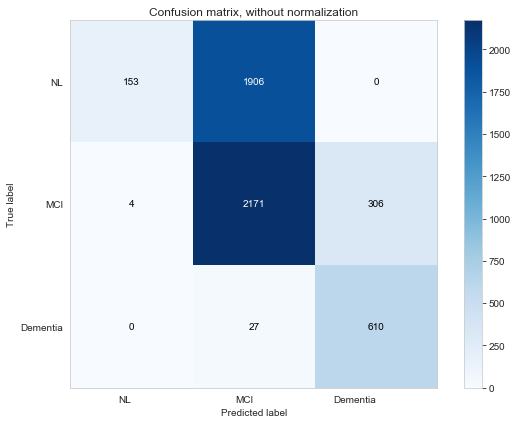

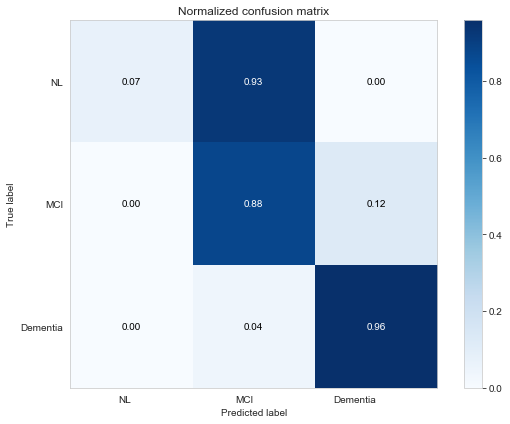

In [99]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid")
sns.despine()


def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(df3['DX'])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (8,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['NL','MCI','Dementia'], yticklabels=['NL','MCI','Dementia'],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Turns off grid on the left Axis.
    ax.grid(False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(test_y, preds_y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_y, preds_y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<Figure size 432x288 with 0 Axes>

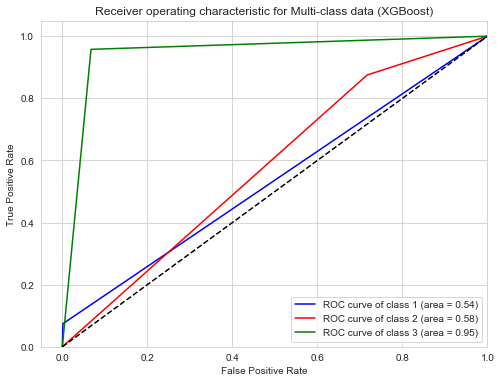

In [91]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

sns.set_style("whitegrid")
sns.despine()
fig,ax = plt.subplots(figsize = (8,6))

# Binarize the output
y_bin = label_binarize(test_y, classes=[ 1, 2,3])
n_classes = y_bin.shape[1]

y_score = label_binarize(preds_y, classes=[1, 2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i] ))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Multi-class data (XGBoost)')
plt.legend(loc="lower right")
plt.show()